# Model Building

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier, BaggingClassifier
from sklearn.svm import SVC
import pickle

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [2]:
xtrain = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Kaggle-Project/main/Water%20Quality(Drinking%20Water%20Potability)/src/main/com/Feature%20Engineering%20%26%20Feature%20Extraction/xtrain.csv')
ytrain = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Kaggle-Project/main/Water%20Quality(Drinking%20Water%20Potability)/src/main/com/Feature%20Engineering%20%26%20Feature%20Extraction/ytrain.csv')

xtrain.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,1.053356,0.281386,0.330439,0.960059,-0.027029,0.977890,0.274949,0.296965,1.561929
1,-0.007642,1.891116,0.373868,0.111971,0.395654,0.022852,-0.094297,-0.427665,2.774111
2,-0.007642,0.608802,0.847430,-2.558752,-0.020694,0.761647,0.458904,0.816479,0.448556
3,-0.007642,1.790008,-0.259815,1.194777,-0.020694,0.186275,0.736721,-0.108191,-0.270303
4,0.392890,-0.326838,1.321641,0.370731,-0.612173,0.630183,-0.703288,-1.553615,0.439443


In [3]:
xtest = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Kaggle-Project/main/Water%20Quality(Drinking%20Water%20Potability)/src/main/com/Feature%20Engineering%20%26%20Feature%20Extraction/xtest.csv')
ytest = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Kaggle-Project/main/Water%20Quality(Drinking%20Water%20Potability)/src/main/com/Feature%20Engineering%20%26%20Feature%20Extraction/ytest.csv')

xtest.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.773968,2.575852,0.336483,0.311844,-2.085383,-1.504393,-0.782879,0.230053,-1.264442
1,0.929859,1.217139,-0.208364,-1.457930,0.532543,-0.489778,0.231102,-0.215457,0.941356
2,2.361030,-2.301080,-0.115875,1.648609,-1.442143,0.035917,-0.764942,0.809850,-1.389594
3,0.720780,1.150285,0.017633,0.561642,-0.639298,-0.711314,-0.833497,-1.118434,0.878015
4,1.287537,-0.510915,1.249140,0.307354,0.578539,-0.389660,-1.270381,1.077371,-2.233133


## Preparing Model From The Dataset

### Picking Model Lowest Training And Testing Difference

In [4]:
def predict(model):
    print('Creating Model With ' + str(model))
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print('Training Accuracy of are Model is : ' + str(model.score(xtrain,ytrain)))
    print('Training Accuracy of are Model is : ' + str(model.score(xtest,ytest)))
    print(classification_report(ytest,ypred))

In [5]:
models = [LogisticRegression(), KNeighborsClassifier(), BaggingClassifier(DecisionTreeClassifier()), BaggingClassifier(RandomForestClassifier()), SVC()]

for i in range(len(models)):
    predict(models[i])

Creating Model With LogisticRegression()
Training Accuracy of are Model is : 0.6294173829990449
Training Accuracy of are Model is : 0.6022889842632332
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       421
           1       0.00      0.00      0.00       278

    accuracy                           0.60       699
   macro avg       0.30      0.50      0.38       699
weighted avg       0.36      0.60      0.45       699

Creating Model With KNeighborsClassifier()
Training Accuracy of are Model is : 0.7449856733524355
Training Accuracy of are Model is : 0.6065808297567954
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       421
           1       0.51      0.36      0.42       278

    accuracy                           0.61       699
   macro avg       0.58      0.56      0.56       699
weighted avg       0.59      0.61      0.59       699

Creating Model With BaggingClassifier(base

### Performing Hyperparameter Tuning

#### Tuning Decision Tree Classifier With Bagging Classifier

In [6]:
params = {
    'criterion' : ["gini", "entropy"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
    }

In [7]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [8]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}

In [9]:
predict(BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, splitter = 'random'), n_estimators=500))

Creating Model With BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        splitter='random'),
                  n_estimators=500)
Training Accuracy of are Model is : 0.6872015281757402
Training Accuracy of are Model is : 0.6394849785407726
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       421
           1       0.84      0.12      0.20       278

    accuracy                           0.64       699
   macro avg       0.73      0.55      0.48       699
weighted avg       0.71      0.64      0.54       699



#### Tuning Gradient Boosting Classifier

In [10]:
predict(GradientBoostingClassifier( n_estimators=2))

Creating Model With GradientBoostingClassifier(n_estimators=2)
Training Accuracy of are Model is : 0.6294173829990449
Training Accuracy of are Model is : 0.6022889842632332
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       421
           1       0.00      0.00      0.00       278

    accuracy                           0.60       699
   macro avg       0.30      0.50      0.38       699
weighted avg       0.36      0.60      0.45       699



In [11]:
params = {
    'loss' : ['log_loss', 'deviance', 'exponential'],
    'criterion' : ['friedman_mse', 'squared_error'],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : [1,2,3,4,5]
    }

In [12]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [13]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_features': 'log2',
 'n_estimators': 4}

In [14]:
predict(GradientBoostingClassifier(criterion = 'friedman_mse', n_estimators=2, learning_rate = 0.5, loss='deviance',max_features='log2'))

Creating Model With GradientBoostingClassifier(learning_rate=0.5, max_features='log2',
                           n_estimators=2)
Training Accuracy of are Model is : 0.6571155682903533
Training Accuracy of are Model is : 0.6123032904148784
              precision    recall  f1-score   support

           0       0.61      0.96      0.75       421
           1       0.59      0.08      0.15       278

    accuracy                           0.61       699
   macro avg       0.60      0.52      0.45       699
weighted avg       0.60      0.61      0.51       699



#### Tuning Random Forest Classifier With Bagging Classifier

In [15]:
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2'],
    'n_estimators' : [10,20,30,40,50],
    }

In [16]:
grid = GridSearchCV((RandomForestClassifier()), param_grid=params)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [17]:
grid.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 30}

In [18]:
predict(BaggingClassifier(RandomForestClassifier(criterion = 'gini', max_features = 'sqrt'), n_estimators=10))

Creating Model With BaggingClassifier(base_estimator=RandomForestClassifier(max_features='sqrt'))
Training Accuracy of are Model is : 0.9746895893027698
Training Accuracy of are Model is : 0.6552217453505007
              precision    recall  f1-score   support

           0       0.65      0.93      0.76       421
           1       0.69      0.24      0.36       278

    accuracy                           0.66       699
   macro avg       0.67      0.58      0.56       699
weighted avg       0.67      0.66      0.60       699



#### Tuning Logistic Regression With AdaBoost Classifier

In [26]:
predict(AdaBoostClassifier(LogisticRegression()))

Creating Model With AdaBoostClassifier(base_estimator=LogisticRegression())
Training Accuracy of are Model is : 0.6294173829990449
Training Accuracy of are Model is : 0.6022889842632332
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       421
           1       0.00      0.00      0.00       278

    accuracy                           0.60       699
   macro avg       0.30      0.50      0.38       699
weighted avg       0.36      0.60      0.45       699



#### Tuning KNeighborsClassifier With Bagging Classifier

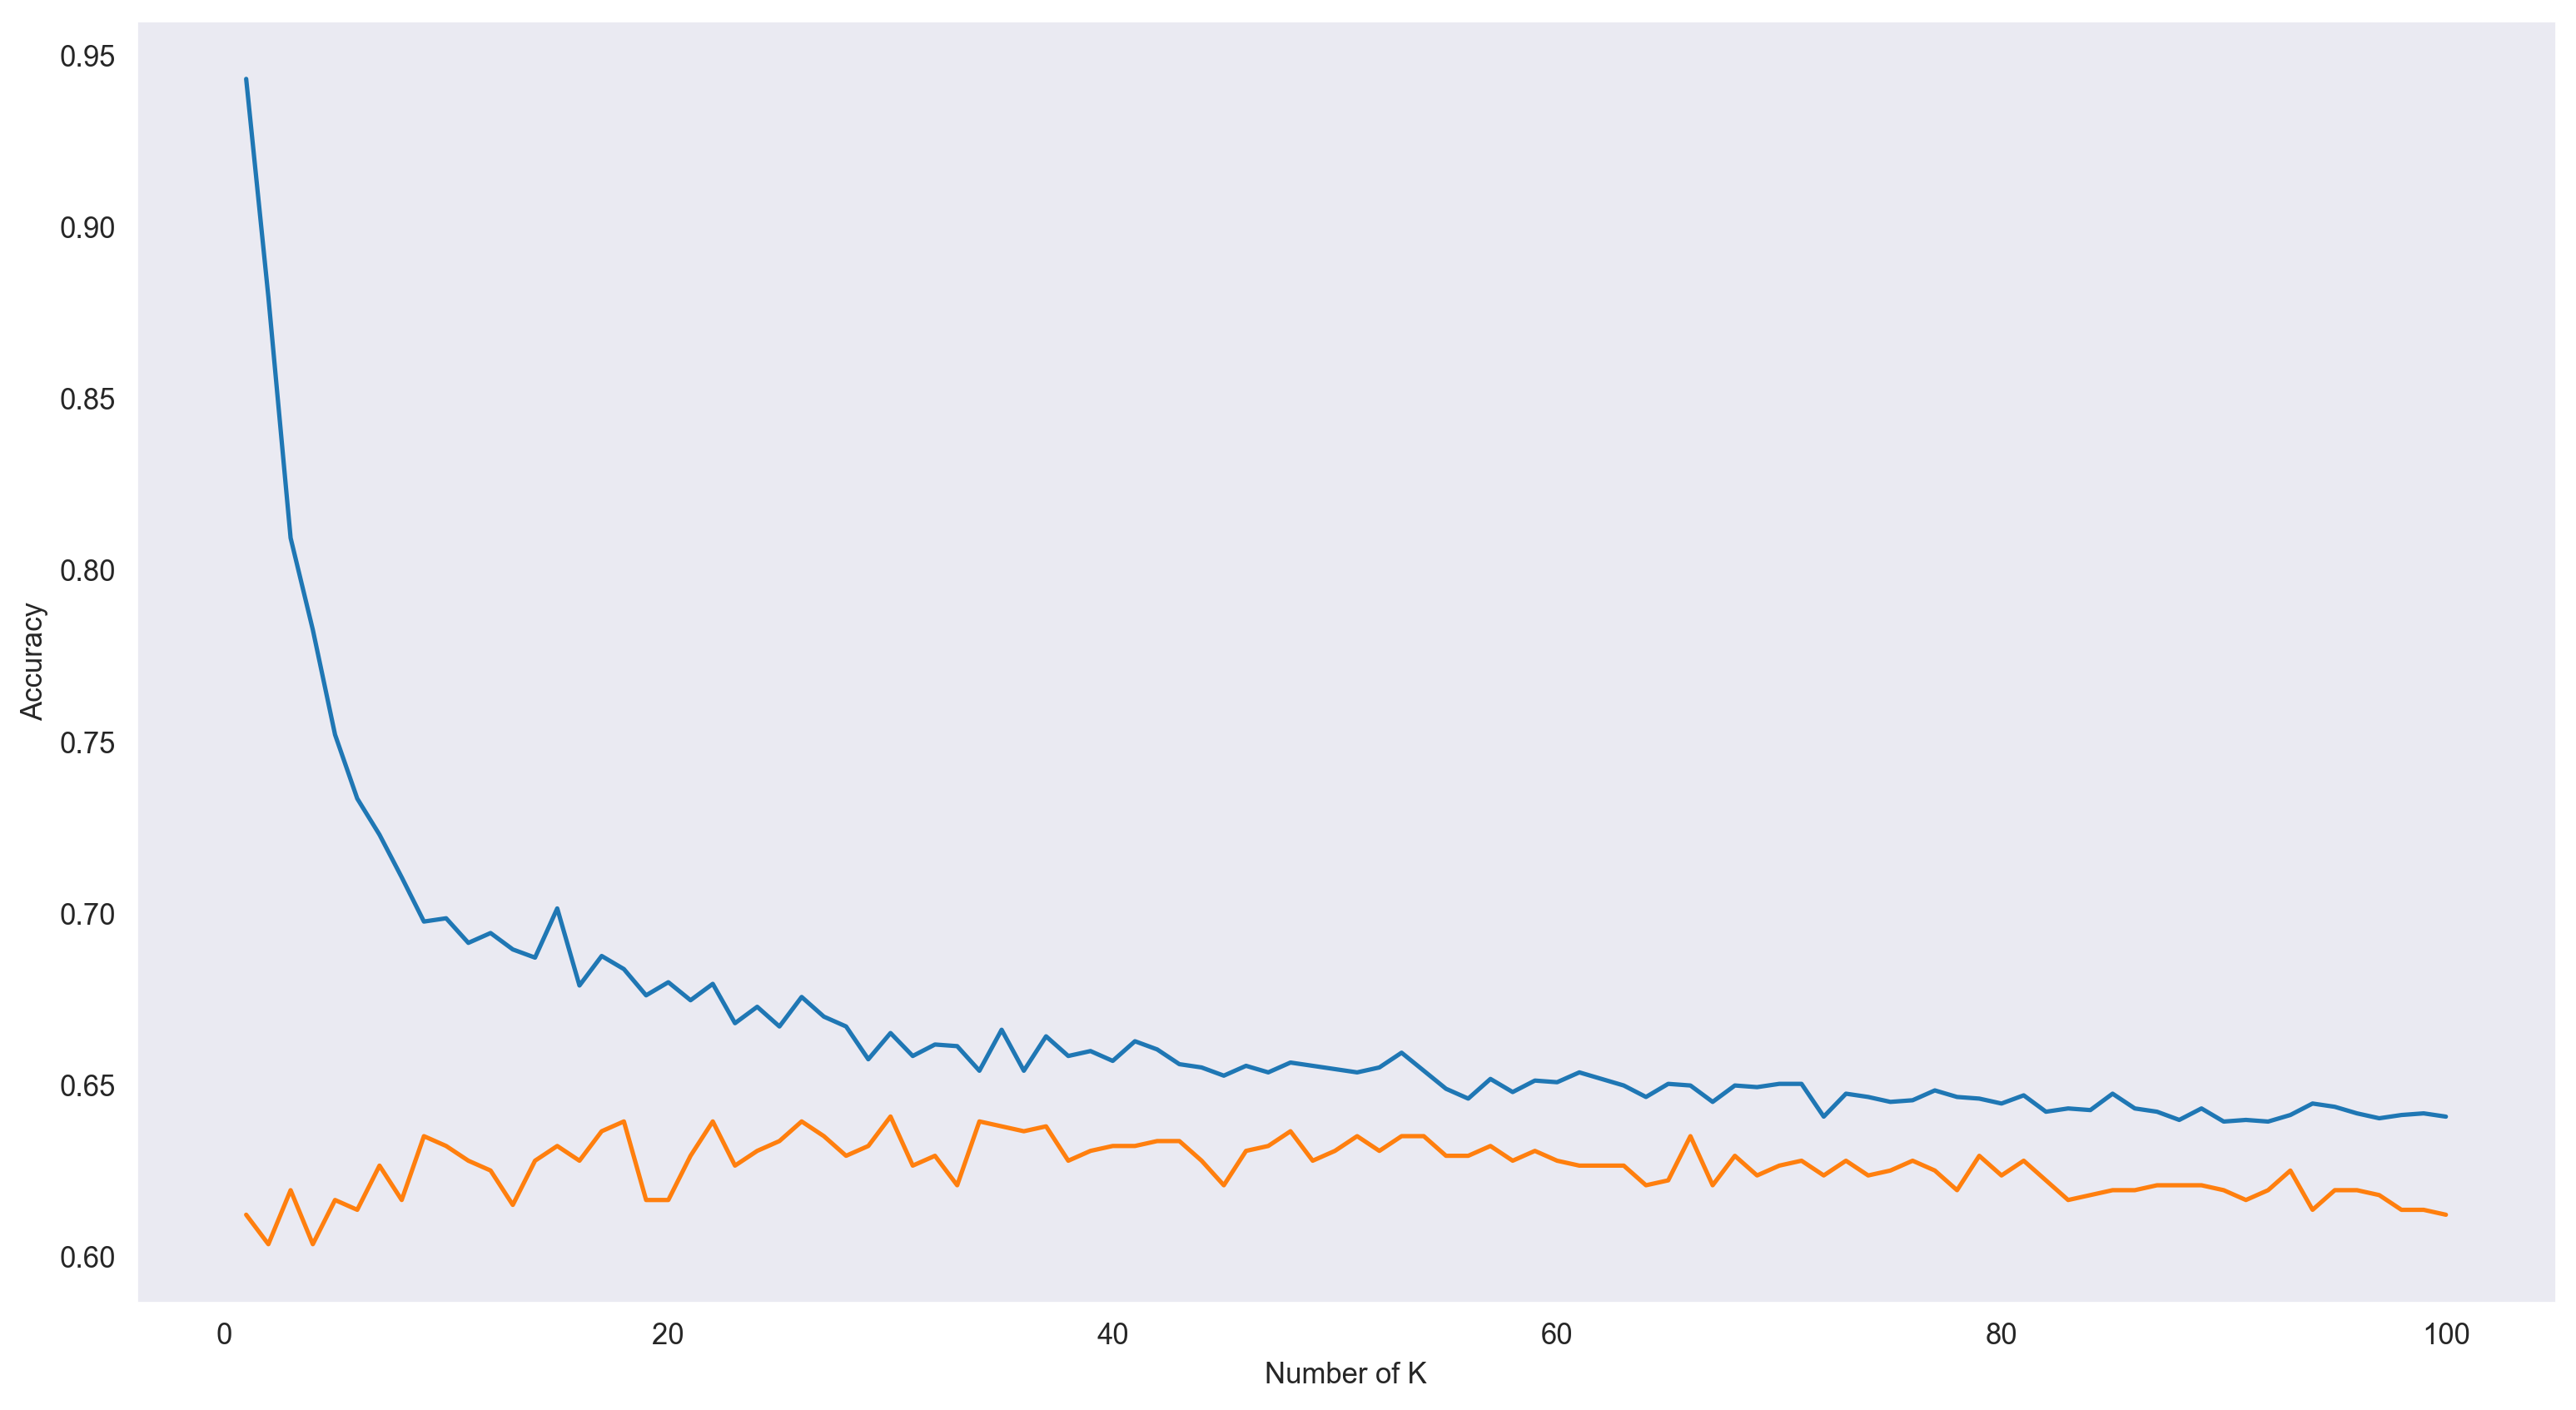

In [27]:
trainac = []
testac = []

for i in range(1,101):
    knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=i),n_estimators = 10)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

plt.title('')
plt.plot(range(1,101),trainac)
plt.plot(range(1,101), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [29]:
predict(BaggingClassifier(KNeighborsClassifier(n_neighbors=78),n_estimators = 10))

Creating Model With BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=78))
Training Accuracy of are Model is : 0.6437440305635148
Training Accuracy of are Model is : 0.6266094420600858
              precision    recall  f1-score   support

           0       0.62      0.99      0.76       421
           1       0.87      0.07      0.13       278

    accuracy                           0.63       699
   macro avg       0.74      0.53      0.45       699
weighted avg       0.72      0.63      0.51       699



#### Tuning Voting Classifier

In [38]:
models = []

models.append(('al',AdaBoostClassifier(LogisticRegression())))
models.append(('gb',GradientBoostingClassifier(criterion = 'friedman_mse', n_estimators=2, learning_rate = 0.5, loss='deviance',max_features='log2')))
models.append(('br',BaggingClassifier(KNeighborsClassifier(n_neighbors=78),n_estimators = 10)))

In [31]:
predict(VotingClassifier(estimators=models, voting = 'soft'))

Creating Model With VotingClassifier(estimators=[('al',
                              AdaBoostClassifier(base_estimator=LogisticRegression())),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.5,
                                                         max_features='log2',
                                                         n_estimators=2)),
                             ('br',
                              BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=78)))],
                 voting='soft')
Training Accuracy of are Model is : 0.6437440305635148
Training Accuracy of are Model is : 0.6094420600858369
              precision    recall  f1-score   support

           0       0.61      0.99      0.75       421
           1       0.73      0.03      0.06       278

    accuracy                           0.61       699
   macro avg       0.67      0.51      0.40       699
weighted avg       0.66      0.61    

In [32]:
predict(VotingClassifier(estimators=models, voting = 'hard'))

Creating Model With VotingClassifier(estimators=[('al',
                              AdaBoostClassifier(base_estimator=LogisticRegression())),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.5,
                                                         max_features='log2',
                                                         n_estimators=2)),
                             ('br',
                              BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=78)))])
Training Accuracy of are Model is : 0.6361031518624641
Training Accuracy of are Model is : 0.6094420600858369
              precision    recall  f1-score   support

           0       0.61      1.00      0.75       421
           1       0.86      0.02      0.04       278

    accuracy                           0.61       699
   macro avg       0.73      0.51      0.40       699
weighted avg       0.71      0.61      0.47       699



#### Tuning Stacking Classifier

In [68]:
predict(StackingClassifier( estimators = models,
                            final_estimator = GradientBoostingClassifier(criterion = 'friedman_mse', n_estimators=2, learning_rate = 0.5, loss='deviance',max_features='log2')))

Creating Model With StackingClassifier(estimators=[('al',
                                AdaBoostClassifier(base_estimator=LogisticRegression())),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.5,
                                                           max_features='log2',
                                                           n_estimators=2)),
                               ('br',
                                BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=78)))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                              max_features='log2',
                                                              n_estimators=2))
Training Accuracy of are Model is : 0.6461318051575932
Training Accuracy of are Model is : 0.6280400572246065
              precision    recall  f1-score   support

           0       0.62    

### Creating Final Model With Hyperparameter Value

In [59]:
models = []

models.append(('al',AdaBoostClassifier(LogisticRegression())))
models.append(('gb',GradientBoostingClassifier(criterion = 'friedman_mse', n_estimators=2, learning_rate = 0.5, loss='deviance',max_features='log2')))
models.append(('br',BaggingClassifier(KNeighborsClassifier(n_neighbors=78),n_estimators = 10)))

In [60]:
final_model = StackingClassifier(   estimators = models, 
                                    final_estimator = GradientBoostingClassifier(   criterion = 'friedman_mse',
                                                                                    n_estimators=2,
                                                                                    learning_rate = 0.5,
                                                                                    loss='deviance',
                                                                                    max_features='log2'))
final_model.fit(xtrain,ytrain)
ypred = final_model.predict(xtest)

#### Evaluating The Model

##### Creating Classification Report

In [61]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77       421
           1       0.75      0.17      0.28       278

    accuracy                           0.65       699
   macro avg       0.69      0.57      0.52       699
weighted avg       0.68      0.65      0.57       699



##### Comparing Training And Testing Accuracy

In [62]:
print('Training Accuracy of are Model is : ' + str(round(final_model.score(xtrain,ytrain),2))+' %')
print('Testing Accuracy of are Model is : ' + str(round(final_model.score(xtest, ytest),2))+' %')

Training Accuracy of are Model is : 0.66 %
Testing Accuracy of are Model is : 0.65 %


## Creating Model

In [64]:
pickle.dump(final_model, open('model.pkl','wb'))